In [1]:
## Import all the required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import torch
from torch import nn
from torch.utils.data import random_split,DataLoader,Subset
from torch.utils.data import Dataset, DataLoader
import torch.optim as optim
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor,Normalize
import warnings
warnings.filterwarnings("ignore")

## Data Gathering and Preprocessing

In [2]:
class CustomDataset_1(Dataset):
    def __init__(self, csv_file):
        self.data = pd.read_csv(csv_file)

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        sample = self.data.iloc[idx]
        inputs = torch.tensor([sample['x_coor'], sample['y_coor']], dtype=torch.float32)
        target = torch.tensor([sample['u_x'], sample['u_y']], dtype=torch.float32)
        return inputs, target


In [3]:
class CustomDataset_2(Dataset):
    def __init__(self, csv_file):
        self.data = pd.read_csv(csv_file)

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        sample = self.data.iloc[idx]
        inputs = torch.tensor([sample['x_coor'], sample['y_coor']], dtype=torch.float32)
        target = torch.tensor([sample['u_x_low'], sample['u_y_low']], dtype=torch.float32)
        return inputs, target


In [4]:
class CustomDataset_3(Dataset):
    def __init__(self, csv_file):
        self.data = pd.read_csv(csv_file)

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        sample = self.data.iloc[idx]
        inputs = torch.tensor([sample['x_coor'], sample['y_coor']], dtype=torch.float32)
        target = torch.tensor([sample['u_x_high'], sample['u_y_high']], dtype=torch.float32)
        return inputs, target


In [5]:
# Load the dataset
dataset_1 = CustomDataset_1("coordinates_and_disp_40.csv")
dataset_2 = CustomDataset_2("coordinates_and_disp_40.csv")
dataset_3 = CustomDataset_3("coordinates_and_disp_40.csv")

# Define batch size
batch_size = len(dataset_1)

# Create data loader
train_data_loader_1 = DataLoader(dataset_1, batch_size=batch_size, shuffle=True)
train_data_loader_2 = DataLoader(dataset_2, batch_size=batch_size, shuffle=True)
train_data_loader_3 = DataLoader(dataset_3, batch_size=batch_size, shuffle=True)

## Forming Networks

In [6]:
class Artificial_NN_A(nn.Module):
    def __init__(self):
        super(Artificial_NN_A, self).__init__()
        self.hidden_layers = nn.Sequential(
            nn.Linear(2, 150),
            nn.ReLU(),
            nn.Linear(150, 150),
            nn.ReLU(),
            nn.Linear(150, 2)  # Adjust output size to 2
        )
        
    def forward(self, input_d):
        hidden_outcome = self.hidden_layers(input_d)
        return hidden_outcome  # No activation function in the final layer for regression

In [7]:
def Train_Network(num_of_epochs, learning_rate, training_set):
    
    ANN = Artificial_NN_A()  

    # choosing the cross entropy loss
    loss_fn = nn.CrossEntropyLoss()

    # choose ADAM optimizer and learning rate
    optimizer = optim.Adam(ANN.parameters(), lr=learning_rate)
    
    losses = []  # List to store losses for plotting
    
    for epoch in range(num_of_epochs+1):
        
        for inputs, labels in training_set:
            
            optimizer.zero_grad()
            
            predictions = ANN(inputs)   # make predictions
            
            calc_loss = loss_fn(predictions, labels)  # calculate loss
            
            # Backprop
            calc_loss.backward()
            
            # update all the parameters
            optimizer.step()
            
            if epoch % 50 == 0:    
                print(f'Epoch {epoch}, Loss: {calc_loss.item()}')
                
            losses.append(calc_loss.item())  # Append loss for plotting
            
            if epoch == 500:
                print(f'Final_Loss: {calc_loss.item()}')
                    
    # Plotting loss versus epoch
    plt.plot(range(len(losses)), losses)
    plt.xlabel('Epoch')
    plt.ylabel('Cross Entropy Loss')
    plt.title('Cross Entropy Loss vs Epoch')
    plt.show()
    
    return ANN  # return the model

In [13]:
def Test_Network(test_set, model):
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in test_set:
            predictions = model(inputs)
    
    return predictions

Epoch 0, Loss: 0.20363499224185944
Epoch 50, Loss: 0.16289106011390686
Epoch 100, Loss: 0.16095906496047974
Epoch 150, Loss: 0.15994471311569214
Epoch 200, Loss: 0.15960723161697388
Epoch 250, Loss: 0.15946365892887115
Epoch 300, Loss: 0.15938369929790497
Epoch 350, Loss: 0.15933135151863098
Epoch 400, Loss: 0.15929491817951202
Epoch 450, Loss: 0.15926656126976013
Epoch 500, Loss: 0.1592441350221634
Final_Loss: 0.1592441350221634


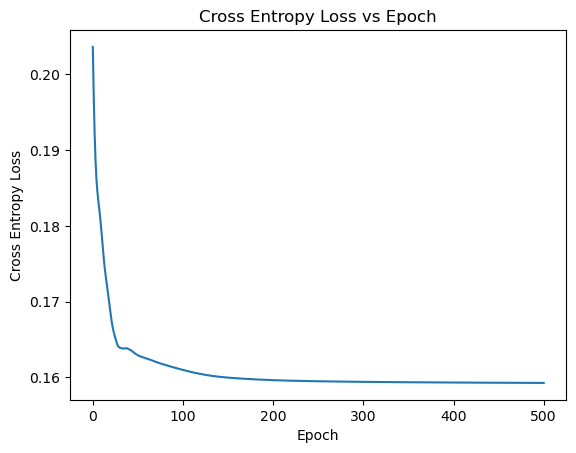

In [9]:
trained_model_1 = Train_Network(500,0.001,train_data_loader_1)

In [14]:
u_pred = Test_Network(train_data_loader_1, trained_model_1) + torch.tensor([sample['u_x_low'], sample['u_y_low']], dtype=torch.float32)

tensor([[-0.5819,  0.4479],
        [-0.5474,  0.4324],
        [-0.8526,  0.6875],
        ...,
        [ 0.7669, -0.8144],
        [-0.5682,  0.4263],
        [ 0.7217, -0.7621]])